In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df=pd.read_csv("WalmartSalesData.csv")

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [28]:
df.info()

#data.shape
df.columns
#data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
data.describe() #.round()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Business Question To Answer

### Generic Question

1. How many distinct cities are present in the dataset?2. 
In which city is each branch situated?


In [12]:
#Count the distinct cities in the dataset

distinct_city=df['City'].unique()
#num_distinct_city=df['City'].nunique()
# Print the number of unique cities
print("Distinct cities:", distinct_city)
print("Number of Distinct cities:", len(distinct_city))

Distinct cities: ['Yangon' 'Naypyitaw' 'Mandalay']
Number of Distinct cities: 3


In [26]:
branch_city = df.groupby('City')['Branch'].unique()
#This snippet performs grouping by 'City', and for each city, it extracts the unique 'Branch' values.
branch_city

City
Mandalay     [B]
Naypyitaw    [C]
Yangon       [A]
Name: Branch, dtype: object

## Product Analysis

1. How many distinct product lines are there in the dataset?

2. What is the most common payment method?

3. What is the most selling product line?

4. What is the total revenue by month?

5. Which month recorded the highest Cost of Goods Sold (COGS)?

6. Which product line generated the highest revenue?

7. Which city has the highest revenue?
   
8. Which product line incurred the highest VAT?
9. Retrieve each product line and add a column product_category, indicating 'Good' or 'Bad,' based on
10. Whether its sales are above the average.
11. Which branch sold more products than average product sold?
12. What is the most common product line by gender?
13. What is the average rating of each product line?


In [32]:
prod_line=df['Product line'].unique()
prod_nline=df['Product line'].nunique()
print("Number of Unique Product Line:",prod_nline)
print("Unique Product Line:",prod_line)

Number of Unique Product Line: 6
Unique Product Line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


The most common payment method is: Ewallet with total of 345 times.


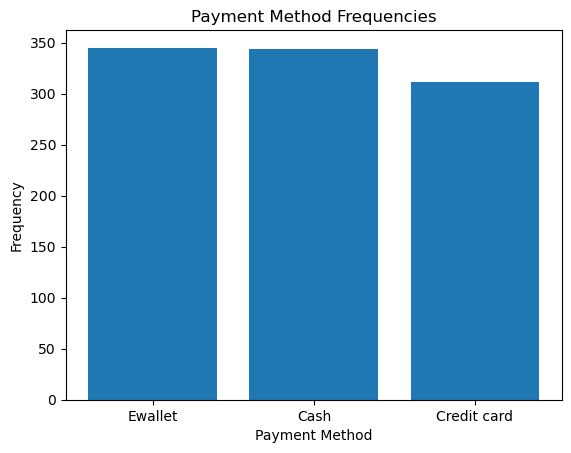

In [44]:
# What is the most common payment method?
# Count the occurrences of each payment method
payment_counts = df["Payment"].value_counts()

# Get the most common payment method
most_common_payment = payment_counts.idxmax()
n_most_common_payment = payment_counts.max()

# Print the result
print("The most common payment method is:", most_common_payment,"with total of",n_most_common_payment,"times.")

# Plot the payment method frequencies

payment_counts = df["Payment"].value_counts()

plt.bar(payment_counts.index, payment_counts.values)
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.title("Payment Method Frequencies")

# Adjust the y-axis to start from 250
#plt.ylim(300, max(payment_counts.values) + 10)

plt.show()

The most selling product line is: Electronic accessories


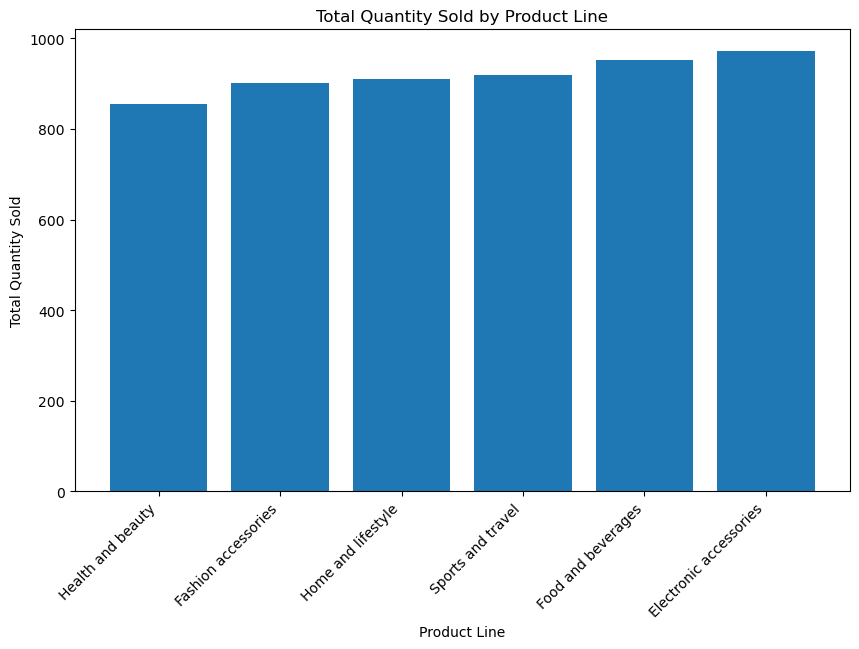

In [58]:
# Group the data by product line and calculate the sum of quantities sold
product_line_sales = df.groupby('Product line')['Quantity'].sum()

# Find the product line with the highest quantity sold
most_selling_product_line = product_line_sales.idxmax()

print("The most selling product line is:", most_selling_product_line)

plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility

plt.bar(product_line_sales.sort_values(ascending=True).index, 
               product_line_sales.sort_values(ascending=True).values)

plt.title('Total Quantity Sold by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


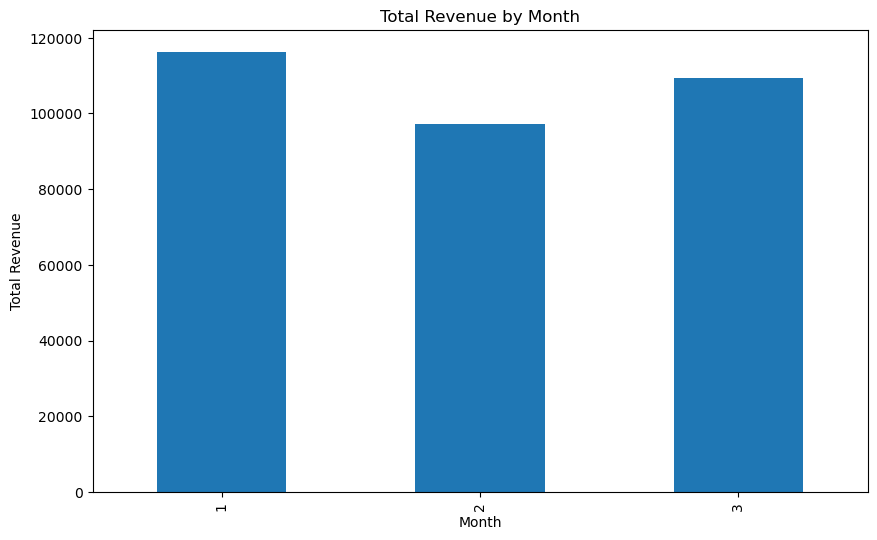

In [64]:
# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the "Date" column
df['Month'] = df['Date'].dt.month

# Calculate the total revenue by month
revenue_by_month = df.groupby('Month')['Total'].sum()

print(revenue_by_month)

fig= plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
#fig.savefig("b.png")
plt.show()

Month
1    110754.16
2     92589.88
3    104243.34
Name: cogs, dtype: float64


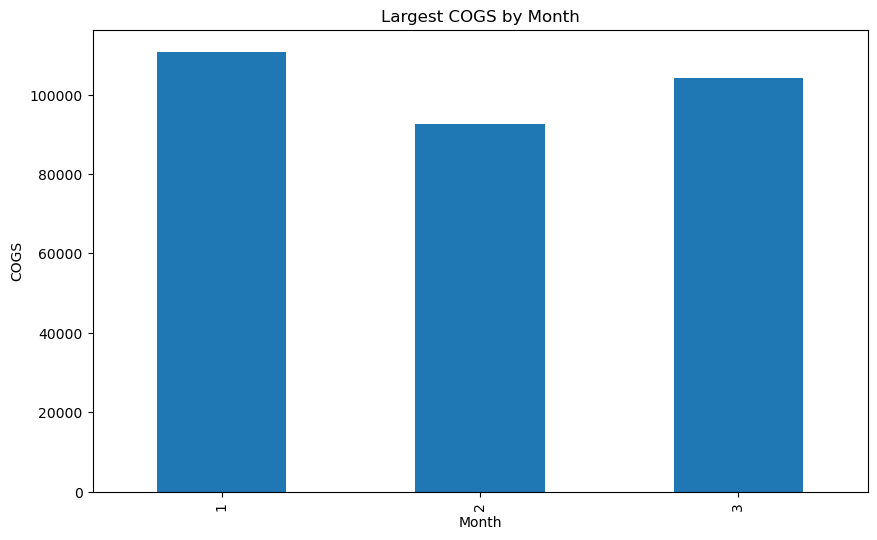

In [67]:
# Calculate the total revenue by month
large_CGOS_month = df.groupby('Month')['cogs'].sum()

print(large_CGOS_month)

#plot month with highest larget COGS
fig= plt.figure(figsize=(10, 6))
large_CGOS_month.plot(kind='bar')
plt.title('Largest COGS by Month')
plt.xlabel('Month')
plt.ylabel('COGS')
fig.savefig("c.png")
plt.show()

The product line with the largest revenue is: Food and beverages


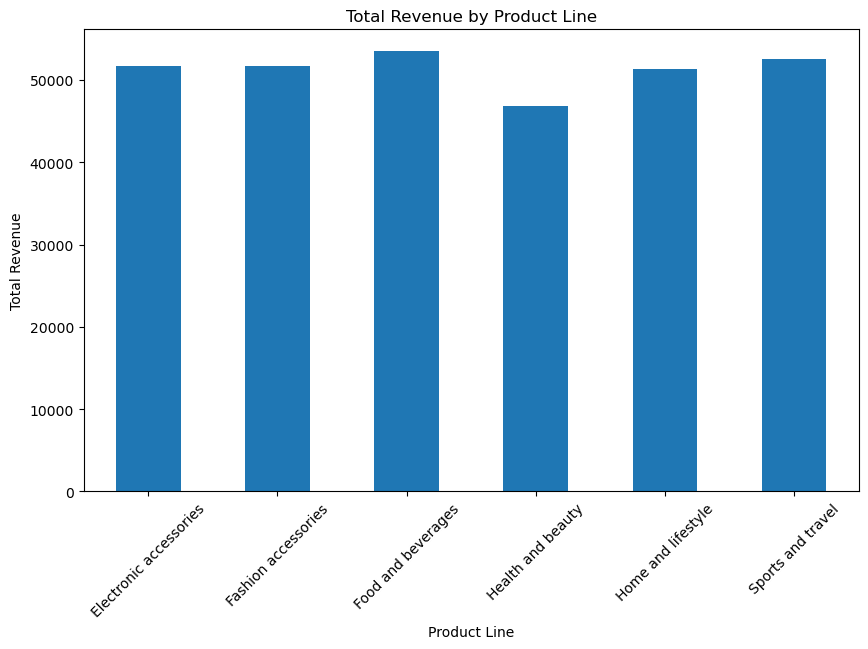

In [69]:
# Calculate the revenue for each product line
df['Revenue'] = df['Quantity'] * df['Unit price']

# Group the data by product line and calculate the sum of revenue
product_line_revenue = df.groupby('Product line')['Revenue'].sum()

# Find the product line with the largest revenue
largest_revenue_product_line = product_line_revenue.idxmax()

print("The product line with the largest revenue is:", largest_revenue_product_line)

plt.figure(figsize=(10, 6))
product_line_revenue.plot(kind='bar')
plt.title('Total Revenue by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

The city with the largest revenue is: Naypyitaw


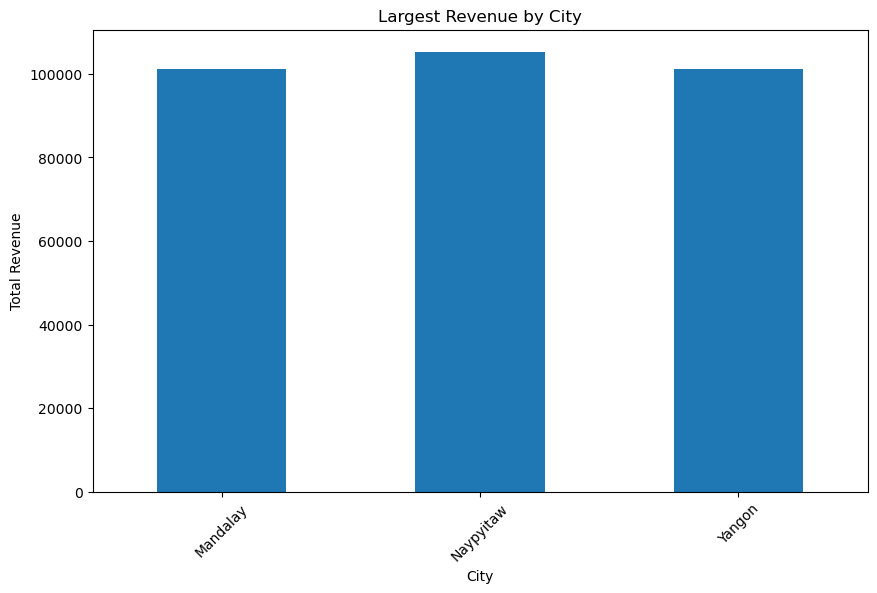

In [70]:
# Calculate the revenue for each product line

df['Revenue'] = df['Quantity'] * df['Unit price']
city_high_revenue = df.groupby('City')['Revenue'].sum()
city_high_revenue_name = city_high_revenue.idxmax()
print("The city with the largest revenue is:", city_high_revenue_name)

plt.figure(figsize=(10, 6))
city_high_revenue.plot(kind='bar')
plt.title('Largest Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

The product line with the largest VAT is: Food and beverages


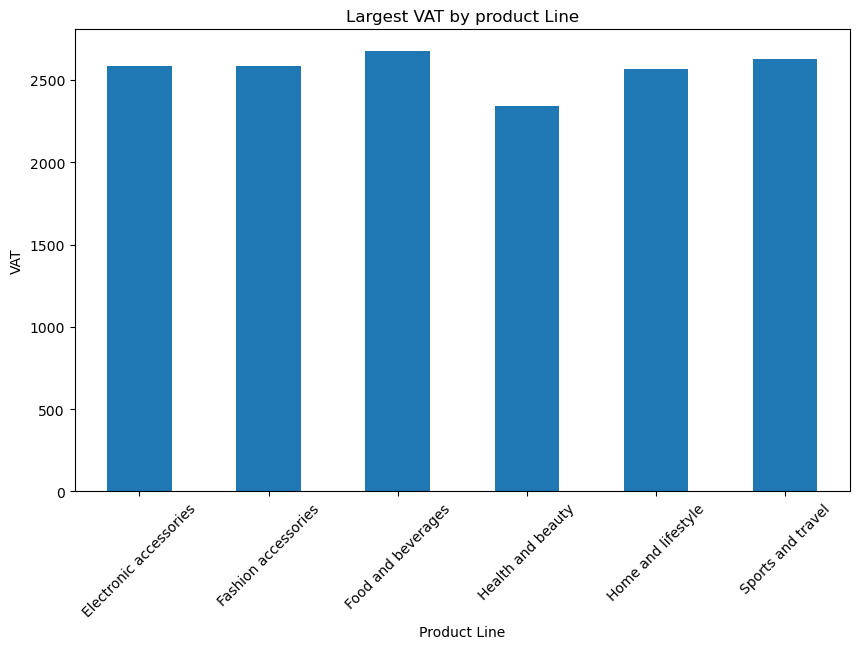

In [71]:
product_line_vat= df.groupby('Product line')['Tax 5%'].sum()

largest_product_line_vat= product_line_vat.idxmax()
print("The product line with the largest VAT is:", largest_product_line_vat)

plt.figure(figsize=(10, 6))
product_line_vat.plot(kind='bar')
plt.title('Largest VAT by product Line')
plt.xlabel('Product Line')
plt.ylabel('VAT')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Calculate the average sales. 

average_sales = df['Total'].mean()

# Add a new column 'Sales Status' to indicate whether sales are 'Good' or 'Bad'
df['Sales Status'] = df['Total'].apply(lambda x: 'Good' if x > average_sales else 'Bad')

# Display the updated DataFrame
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

The lambda function allows you to quickly create a simple function in-line (without naming it) to decide whether the sales status should be 'Good' or 'Bad'. This avoids the need to define a separate function with def.

def sales_status(x):
    if x > average_sales:
        return 'Good'
    else:
        return 'Bdata['Sales Status'] = data['Total'].apply(sales_status)
ad'


['A' 'C' 'B']


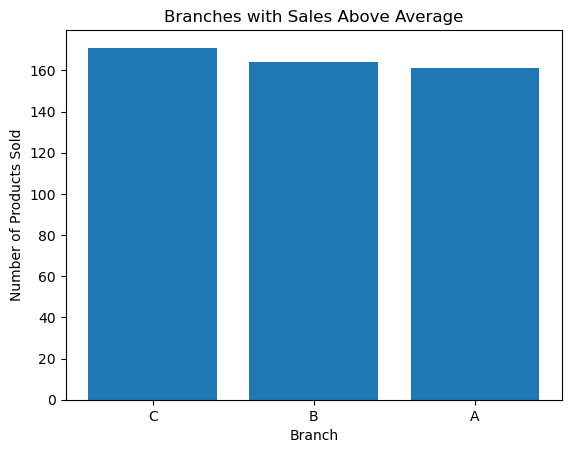

In [79]:
# Calculate the average number of products sold
average_products_sold = df['Quantity'].mean()

#********
# Filter the DataFrame to include branches with sales greater than the average
branches_above_average = df[df['Quantity'] > average_products_sold]['Branch'].unique()

print(branches_above_average)

# Display the branches that sold more products than the average
#print("Branches with sales above average:")
#for branch in branches_above_average:
#print(branch)

branches_above_average = df[df['Quantity'] > average_products_sold]['Branch'].value_counts()
plt.bar(branches_above_average.index, branches_above_average.values)
plt.xlabel('Branch')
plt.ylabel('Number of Products Sold')
plt.title('Branches with Sales Above Average')
plt.show()

   Gender         Product line
1  Female  Fashion accessories
9    Male    Health and beauty


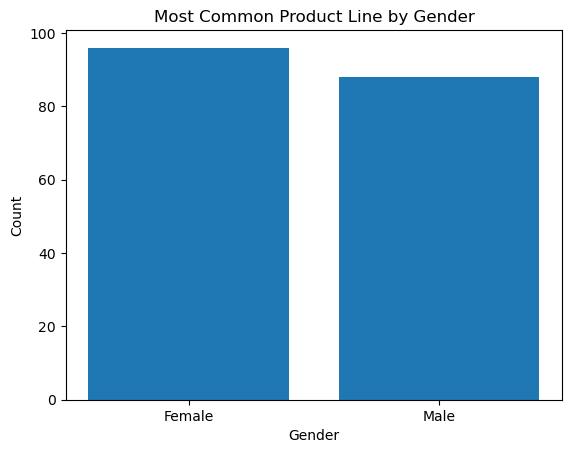

In [81]:
grouped_data = df.groupby(['Gender', 'Product line']).size().reset_index(name='Count')
#************

# Find the most common product line for each gender
most_common_product_line = grouped_data.groupby('Gender')['Count'].idxmax()
most_common_product_line_data = grouped_data.loc[most_common_product_line]

# Display the most common product line for each gender
print(most_common_product_line_data[['Gender', 'Product line']])

# Plotting the bar graph
plt.bar(most_common_product_line_data['Gender'], most_common_product_line_data['Count'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Most Common Product Line by Gender')
plt.show()

In [84]:
#What is the average rating of each product line?

avg_rating=df.groupby('Product line')['Rating'].mean()
print(avg_rating)

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64
